In [3]:
#IMPORT LIBRARIES#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
#IMPORT DATASET#
data = pd.read_csv(r'C:\Users/elish/Downloads/archive(2)/fetal_health.csv')

# Display basic information
print(data.info())
print(data.head())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
#DATA CLEANING#
# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

# Removing duplicates if found
data = data.drop_duplicates()


baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [9]:
#DATA MINING#
#Classification 
# Split data into features and target
X = data.drop(columns='fetal_health')
y = data['fetal_health']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9526813880126183
Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       497
         2.0       0.92      0.74      0.82        90
         3.0       0.94      0.96      0.95        47

    accuracy                           0.95       634
   macro avg       0.94      0.90      0.91       634
weighted avg       0.95      0.95      0.95       634



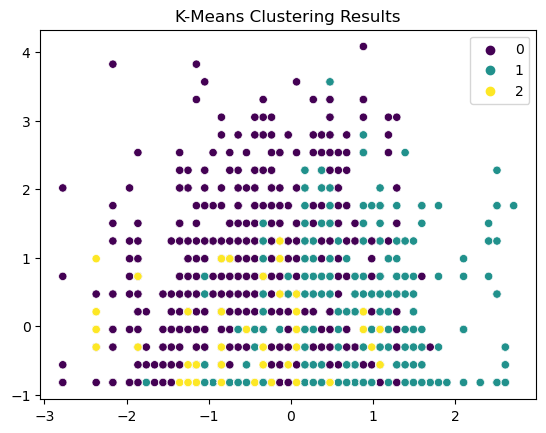

In [11]:
#Clustering 
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering with n_init specified
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # n_init is set to 10 explicitly
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to the dataset for analysis
data['Cluster'] = clusters

# Visualize clustering results
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis')
plt.title("K-Means Clustering Results")
plt.show()

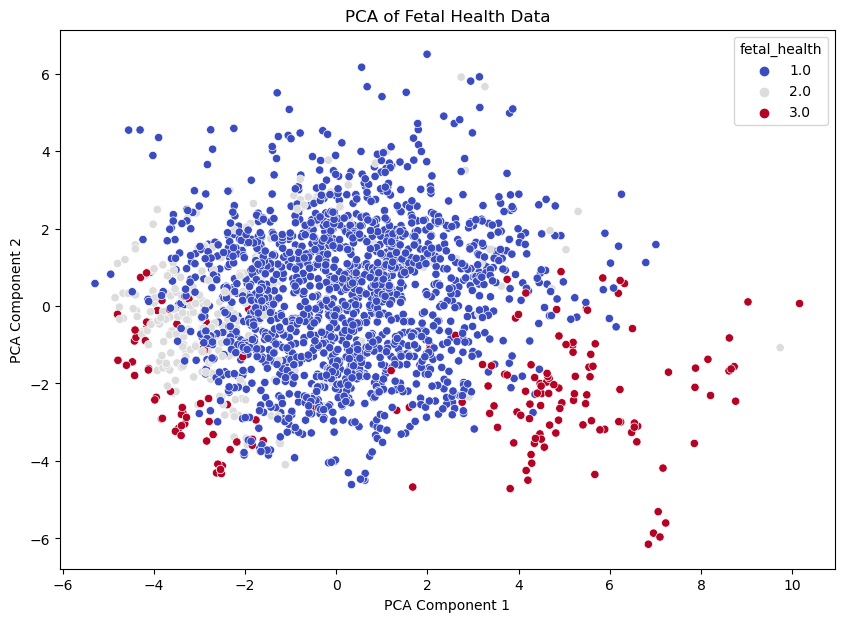

In [13]:
#PCA
# Apply PCA for 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA components with fetal health categories
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm')
plt.title('PCA of Fetal Health Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

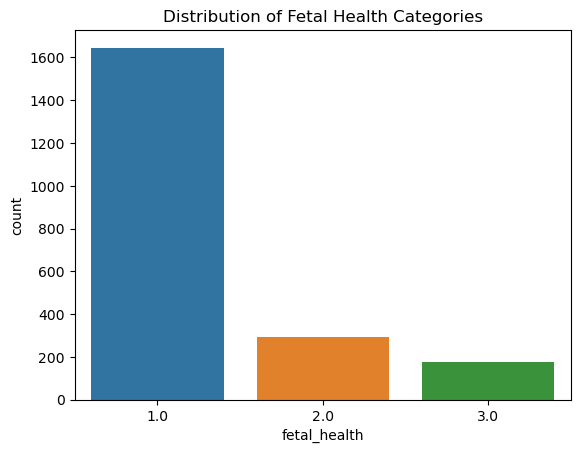

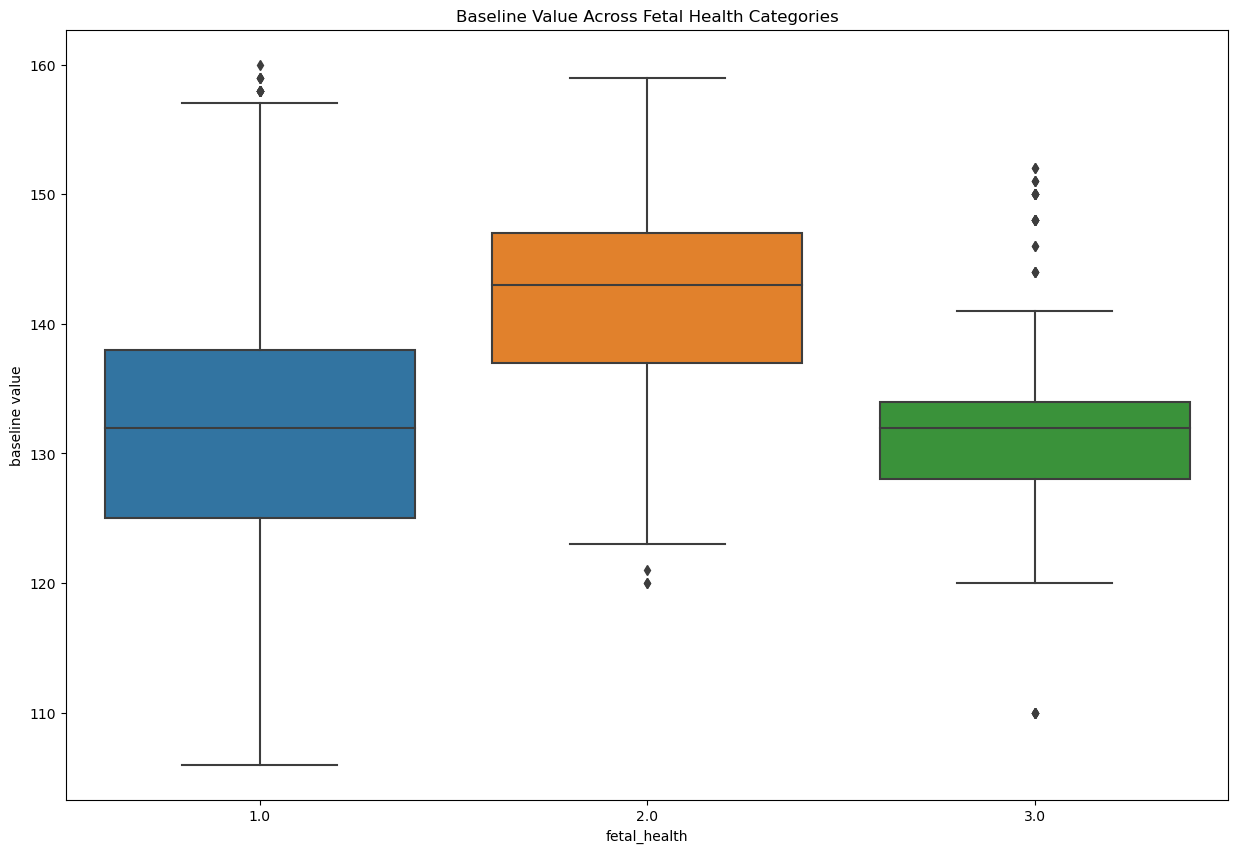

In [17]:
# Question 1: What are the characteristics of fetal health categories? #
# Distribution of the target variable
# Make sure 'baseline_value' is numeric
data['baseline value'] = pd.to_numeric(data['baseline value'], errors='coerce')
sns.countplot(x='fetal_health', data=data)
plt.title('Distribution of Fetal Health Categories')
plt.show()

# Boxplot for features by fetal health
plt.figure(figsize=(15,10))
sns.boxplot(data=data, x='fetal_health', y='baseline value')
plt.title('Baseline Value Across Fetal Health Categories')
plt.show()

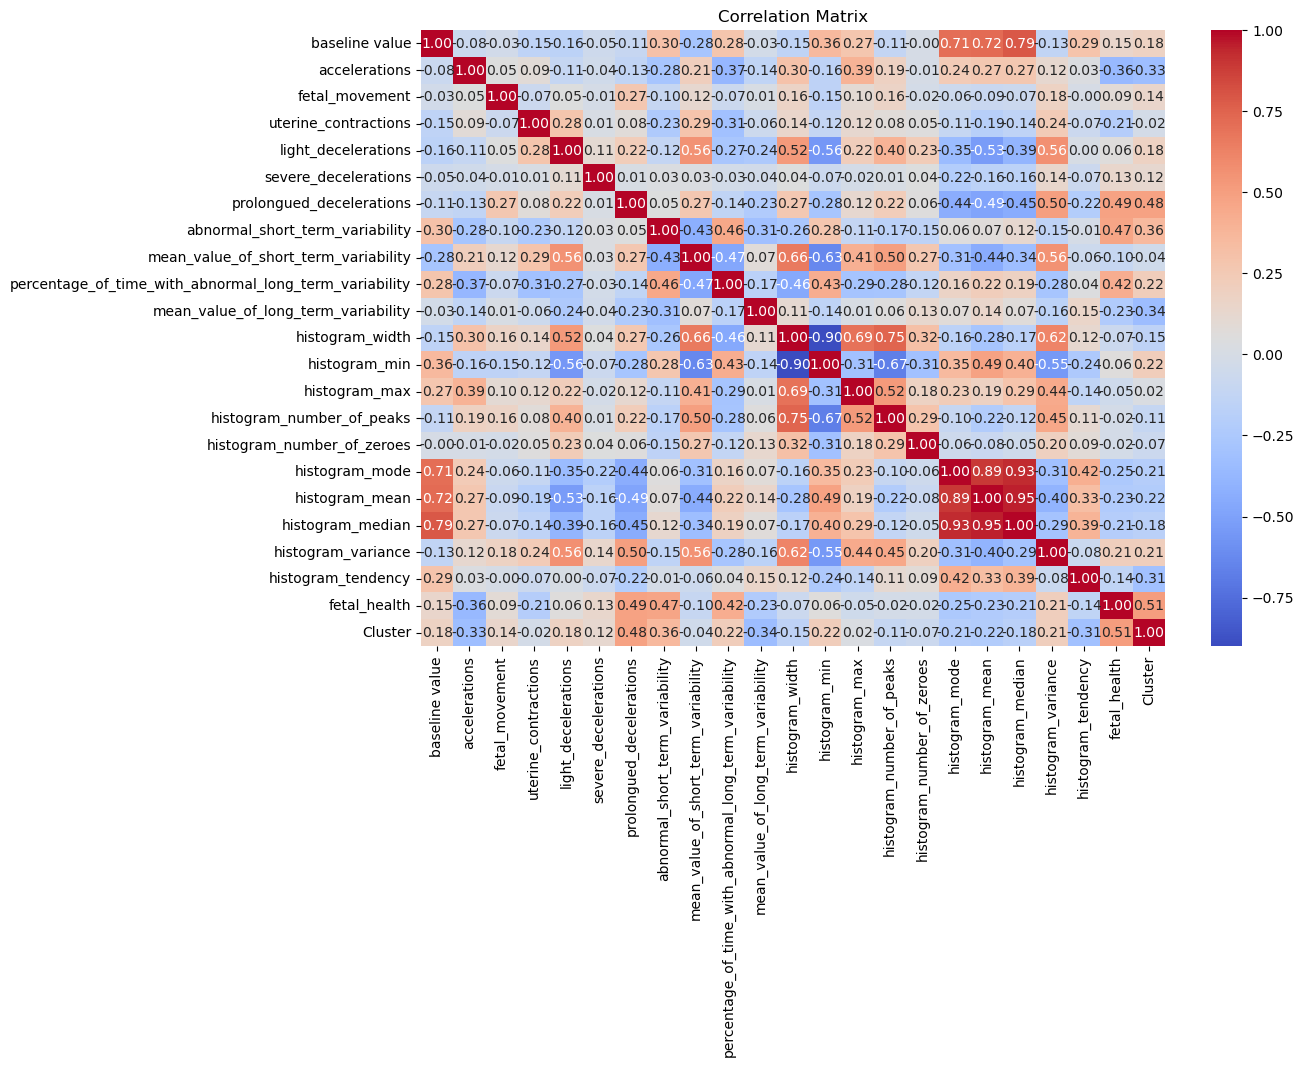

In [19]:
# Question 2: Are there any correlations between features? #
# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

C:\Users\elish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


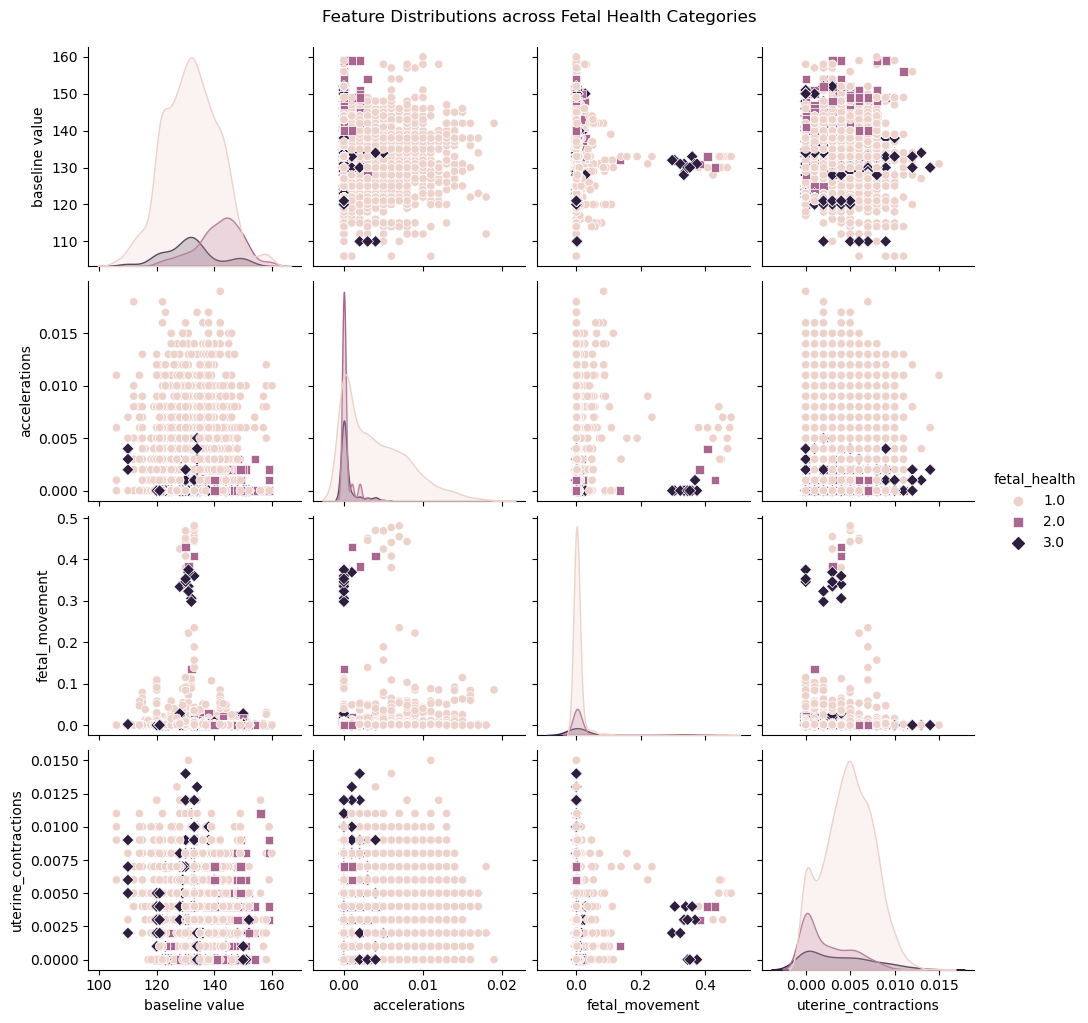

In [27]:
# Question 3: Which features significantly differ among fetal health categories? #
# Select key features for the pairplot to reduce computational load
key_features = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'fetal_health']
sns.pairplot(data[key_features], hue='fetal_health', markers=["o", "s", "D"])

# Add a title
plt.suptitle('Feature Distributions across Fetal Health Categories', y=1.02)
plt.show()

In [25]:
# Predictive Model: Classifying Fetal Health
# Split data into features and target
X = data.drop(columns='fetal_health')
y = data['fetal_health']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9574132492113565
Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      0.99      0.98       497
         2.0       0.93      0.78      0.85        90
         3.0       0.94      0.94      0.94        47

    accuracy                           0.96       634
   macro avg       0.94      0.90      0.92       634
weighted avg       0.96      0.96      0.96       634

